# Chapter1

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-Learning" data-toc-modified-id="Supervised-Learning-1">Supervised Learning</a></span></li><li><span><a href="#Unsupervised-Learning" data-toc-modified-id="Unsupervised-Learning-2">Unsupervised Learning</a></span></li><li><span><a href="#Cost-Function-代价函数" data-toc-modified-id="Cost-Function-代价函数-3">Cost Function 代价函数</a></span></li><li><span><a href="#Gradient-Descent-梯度下降算法" data-toc-modified-id="Gradient-Descent-梯度下降算法-4">Gradient Descent 梯度下降算法</a></span></li><li><span><a href="#Normal-Equation-Method" data-toc-modified-id="Normal-Equation-Method-5">Normal Equation Method</a></span></li><li><span><a href="#Vectorization-向量化" data-toc-modified-id="Vectorization-向量化-6">Vectorization 向量化</a></span></li></ul></div>

# Content

## Supervised Learning

<img src="./img/1-1.png" width="33%">

* ***Regression*** refers to predict a continuous valued output.


* ***Classfication*** refers to predict a discrete valued output (e.g. 0, 1, 2, 3).


   ## Unsupervised Learning
   * ***Clustering*** 

## Cost Function 代价函数

对于一元线性回归问题：

> **Hypothesis:**
>    
> $h_\theta=\theta_0+\theta_1x$
>
> **Parameters:**
>
> $\theta_0, \theta_1$
>
> **Cost Function:**
>
>$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$
>
> **Goal:** $minimize J(\theta_0, \theta_1)$


其中代价函数表示为误差的平方，$m$ 为训练样本数量，$h(x)$ 为假设 *(hypothesis)* 函数。

通过 $minimize J(\theta)$ 求得 $\theta$ 参数。

## Gradient Descent 梯度下降算法

* **Gradient descent algorithm:**

    repeat until convergence {

    $\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$, (for $j=0$ and $j=1$)

    }

    where $\alpha$ denotes the learning rate, controlling how big a step we take when updating parameter $\theta_j$.


* **Simultaneous update:**

    temp0 := $\theta_0 - \alpha\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1)$

    temp1 := $\theta_1 - \alpha\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1)$

    $\theta_0$ := temp0

    $\theta_1$ := tem1

* **Learning rate $\alpha$**

<img src="./img/1-2.png" width="33%">

    As we approach a local minimum, gradient descent will automatically take smaller steps (斜率正数越来越小). So, no need to decrease $\alpha$ over time.

* **Batch gradient descent, BGD**

    "Batch": Each step of gradient descent uses all the training examples.

    优点：精确

    缺点：样本数量大时，速度慢

* **Example**

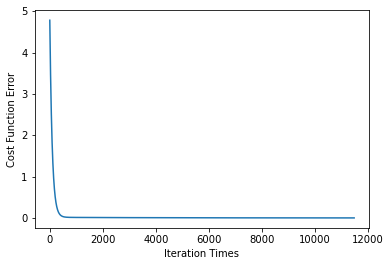

In [15]:
# 假设函数为一元线性函数时
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go


x = [1, 2, 3]
y = [2, 3, 4]

theta_0 = 0
theta_1 = 0

m = len(x) # number of training examples

alpha = 0.001 # learning rate

threshold = 0.001 # error control

cost_dict = {} # cost function result 

iter_num = 0 # iteration times


def cost_j(theta_0, theta_1):
    tmp = 0
    for i in range(m):
        tmp += (theta_0 + theta_1 * x[i] - y[i])**2
    return tmp/(2*m)


def gradient_descent(theta_0, theta_1):
    tmp_0 = tmp_1 = 0
    for i in range(m):
        tmp_0 += theta_0 + theta_1 * x[i] - y[i]
        tmp_1 += (theta_0 + theta_1 * x[i] - y[i]) * x[i]
    theta_0 -= alpha * tmp_0 / m
    theta_1 -= alpha * tmp_1 / m
    return theta_0, theta_1


cost = cost_j(theta_0, theta_1)
#print("initial cost = {}".format(cost))

while cost > threshold:
    theta_0, theta_1 = gradient_descent(theta_0, theta_1)
    iter_num += 1
    cost = cost_j(theta_0, theta_1)
    cost_dict[iter_num] = cost
    #print("iteration {}, theta_0 = {}, theta_1 = {}".format(iter_num, theta_0, theta_1))

plt.figure()
plt.plot(list(cost_dict.keys()), list(cost_dict.values()))
plt.xlabel('Iteration Times')
plt.ylabel("Cost Function Error")
plt.show()

# x = list(cost_dict.keys())
# y = list(cost_dict.values())
# fig = go.Figure(data=go.Scatter(x=x, y=y))
# fig.show()

initial cost = 17.82


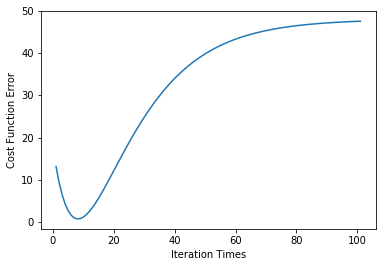

In [2]:
# 假设函数为多元线性函数时   underfit
import matplotlib.pyplot as plt


x = [[1, 1, 1, 1, 1],
     [2, 2, 2, 2, 2],
     [3, 3, 3, 3, 3],
     [4, 4, 4, 4, 4],
     [5, 5, 5, 5, 5]]

y = [1.8, 3.6, 5.4, 7.2, 9]

theta = [0, 0, 0, 0, 0, 0]

m = len(x)  # number of training examples

alpha = 0.001  # learning rate

threshold = 0.001  # error control

cost_dict = {}  # cost function result

iter_num = 0  # iteration times


def cost_j(theta):
    tmp1 = 0
    tmp2 = 0
    for i in range(m):
        tmp1 += theta[0]
        for j in range(m):
            tmp1 += theta[j+1] * x[i][j]
        tmp2 += (tmp1 - y[i])**2
    return tmp2/(2*m)


def gradient_descent(theta):
    tmp = [0, 0, 0, 0, 0, 0]
    tmp1 = 0
    for i in range(m):
        tmp1 = theta[0]
        for j in range(m):
            tmp1 += theta[j+1] * x[i][j]
        tmp1 -= y[i]

        tmp[0] += tmp1  # 对应 theta[0]

        for j in range(m):
            # 对应 theta[1] ~ theta[5]
            tmp[j+1] += tmp1 * x[i][j]

    theta[0] -= alpha * tmp[0] / m
    for j in range(m):
        theta[j+1] -= alpha * tmp[j+1] / m
    return theta


cost = cost_j(theta)
print("initial cost = {}".format(cost))

while cost > threshold:
    theta = gradient_descent(theta)
    iter_num += 1
    cost = cost_j(theta)
    cost_dict[iter_num] = cost
    #print("iteration {}, theta = {}".format(iter_num, theta))
    if iter_num > 100:
        break

plt.figure()
plt.plot(list(cost_dict.keys()), list(cost_dict.values()))
plt.xlabel("Iteration Times")
plt.ylabel("Cost Function Error")
plt.show()


initial cost = 78.806


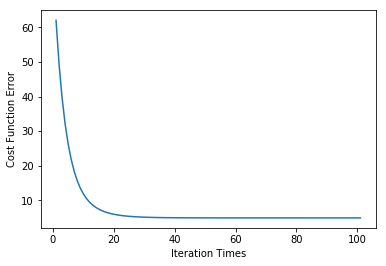

In [3]:
# 假设函数为非线性函数时    underfit
import matplotlib.pyplot as plt

# hypothesis = theta_0 + theta_1 * x_0 + theta_2 * (x_1 * x_2) + theta_3 * x_3
# 2.5 + 0.6 * () + 0.3 * () + 1.2 * ()

x = [[1, 1, 1, 1],
     [2, 2, 2, 2],
     [3, 3, 3, 3],
     [4, 4, 4, 4],
     [5, 5, 5, 5]]

y = [4.6, 7.3, 10.6, 15.5, 19]

theta = [0, 0, 0, 0]

m = len(x)  # number of training examples

alpha = 0.001  # learning rate

threshold = 0.01  # error control

cost_dict = {}  # cost function result

iter_num = 0  # iteration times


def cost_j(theta):
    tmp = 0
    for i in range(m):
        tmp += (theta[0] + theta[1] * x[i][0] + theta[2] * (x[i][1] * x[i][2]) + theta[3] * x[i][3] - y[i]) ** 2
    return tmp/(2*m)


def gradient_descent(theta):
    tmp = [0, 0, 0, 0]
    tmp1 = 0
    for i in range(m):
        tmp[0] = theta[0] + theta[1] * x[i][0] + theta[2] * (x[i][1] * x[i][2]) + theta[3] * x[i][3] - y[i]
        tmp[1] = (theta[0] + theta[1] * x[i][0] + theta[2] * (x[i][1] * x[i][2]) + theta[3] * x[i][3] - y[i]) * x[i][0]
        tmp[2] = (theta[0] + theta[1] * x[i][0] + theta[2] * (x[i][1] * x[i][2]) + theta[3] * x[i][3] - y[i]) * x[i][1] * x[i][2]
        tmp[3] = (theta[0] + theta[1] * x[i][0] + theta[2] * (x[i][1] * x[i][2]) + theta[3] * x[i][3] - y[i]) * x[i][3]

    theta[0] -= alpha * tmp[0] / m
    theta[1] -= alpha * tmp[1] / m
    theta[2] -= alpha * tmp[2] / m
    theta[3] -= alpha * tmp[3] / m
    return theta


cost = cost_j(theta)
print("initial cost = {}".format(cost))

while cost > threshold:
    theta = gradient_descent(theta)
    iter_num += 1
    cost = cost_j(theta)
    cost_dict[iter_num] = cost
    # print("iteration {}, theta = {}".format(iter_num, theta))
    if iter_num > 100:
        break


plt.figure()
plt.plot(list(cost_dict.keys()), list(cost_dict.values()))
plt.xlabel("Iteration Times")
plt.ylabel("Cost Function Error")
plt.show()

## Normal Equation Method



## Vectorization 向量化

**Vectorization example.**

对于线性回归问题，

给定训练样本的 features 为 $x = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$，则：

1. 假设函数为

    $\begin{equation}
    \begin{aligned}
    h(\theta) &= \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 \dots + \theta_n x_n \\
    &=\sum_{j=0}^{n} \theta_j x_j \\
    &= \begin{bmatrix} \theta_0 \theta_1 \theta_2 \dots \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \\
    &= \theta^T x \\
    \end{aligned}
    \end{equation}$
    
    
2. 参数 $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix}$


3. 代价函数为

    $\begin{equation}
    \begin{aligned}
    J(\theta) &= \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \\ 
    &= \frac{1}{2m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})^2 \\
    \end{aligned}
    \end{equation}$

    注意，这里的 $m$ 为训练样本数量，上式中的 $n$ 为样本特征个数。


4. 梯度下降为:
    
    $\begin{equation}
    \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}
    \end{equation}$

    即：
    
    $\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) x_0^{(i)}$
    
    $\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) x_1^{(i)}$
    
    $\theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) x_2^{(i)}$
    
    $\vdots$
    
    向量化后为：
    
    $\theta := \theta - \alpha \delta$
    
    其中， $\theta$ 和 $\delta$ 都是向量， 即：
    
    $\begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} := \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} - \alpha \begin{bmatrix} \delta_0 \\ \delta_1 \\ \delta_2 \\ \vdots \\ \delta_n \end{bmatrix}$
    
    而 $\delta = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}$, 即
    
    $\delta_0 = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_0^{(i)}$
    
    $\delta_1 = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_1^{(i)}$
    
    $\delta_2 = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_2^{(i)}$
    
    $\vdots$
    
    $\delta_n = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_n^{(i)}$
    
    即：
    
    $\begin{bmatrix} \delta_0 \\ \delta_1 \\ \delta_2 \\ \vdots \\ \delta_n \end{bmatrix} = \frac{1}{m} \sum_{i=1}^m \left ( (h_{\theta}(x^{(i)}) - y^{(i)}) \begin{bmatrix} x_0^{(i)} \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix} \right)$
    
    所以，
    
    $\begin{equation}
    \begin{aligned}
    \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} &:= \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} - \alpha \frac{1}{m} \sum_{i=1}^m \left ( (h_{\theta}(x^{(i)}) - y^{(i)}) \begin{bmatrix} x_0^{(i)} \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix} \right) \\
    &:= \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( (\theta^T x^{(i)} - y^{(i)}) \begin{bmatrix} x_0^{(i)} \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix} \right) \\
    \end{aligned}
    \end{equation}$
    
     $\theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( (\theta^T x^{(i)} - y^{(i)}) x^{(i)} \right)$

    其中 $x$ is the design matrix, containing training examples. $x$ 就是设计矩阵，矩阵的元素即训练样本的features.

* **Example**

initial cost = [4.83333333]


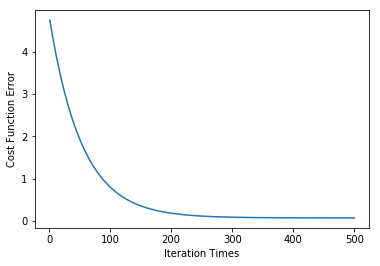

In [38]:
# 假设函数为 h = theta_1 x_1 + theta_2 x_2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([2, 3, 4])

theta = np.zeros((1, 2))

m = x.shape[0] # number of training examples

alpha = 0.001 # learning rate

threshold = 0.001 # error control

cost_dict = {} # cost function result

iter_num = 0 # iteration times


def cost_j(theta):
    tmp = 0
    for i in range(m):
        tmp += (np.dot(theta, x[i, :].T) - y[i])**2   # np.dot(x, y) 计算向量内积
    return tmp/(2*m)


def gradient_descent(theta):
    tmp = 0
    for i in range(m):
        tmp += (np.dot(theta, x[i, :].T) - y[i]) * x[i, :].T

    theta -= alpha * tmp / m
    return theta


cost = cost_j(theta)
print("initial cost = {}".format(cost))

while cost > threshold:
    theta = gradient_descent(theta)
    iter_num += 1
    if iter_num > 500:
        break
    cost = cost_j(theta)
    cost_dict[iter_num] = cost
    #print("iteration {}, theta = {}".format(iter_num, theta))

plt.figure()
plt.plot(list(cost_dict.keys()), list(cost_dict.values()))
plt.xlabel('Iteration Times')
plt.ylabel("Cost Function Error")
plt.show()

# #TODO
* 求最优的算法之一最小二乘法 与梯度下降法的关系
* 梯度下降法局部最优问题的解决方法
* BGD, SGD, MBGD

    
* **Stochastic gradient descent, SGD**
 
* **Mini-batch gradient descent, MBGD**



# Reference

1. [吴恩达机器学习系列课程][1].
  
  
  
[1]: https://www.bilibili.com/video/BV164411b7dx?p=1